<a href="https://colab.research.google.com/github/esinghbe23-ctrl/TOPSIS/blob/main/Topsis_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import topsispy as topsis


In [13]:
uploaded=files.upload()
data=pd.read_csv('Topsis-Dataset.csv')
print(data)

Saving Topsis-Dataset.csv to Topsis-Dataset (3).csv
  Model  Corr  Rseq  RMSE  Accuracy
0    M1  0.79  0.62  1.25     60.89
1    M2  0.66  0.44  2.89     63.07
2    M3  0.56  0.31  1.57     62.87
3    M4  0.82  0.67  2.68     70.19
4    M5  0.75  0.56  1.30     80.39


In [14]:
models = data["Model"]
criteria = data[["Corr", "Rseq", "RMSE", "Accuracy"]]
normalized = criteria / np.sqrt((criteria ** 2).sum())
print("\nNormalized Matrix:")
print(normalized)


Normalized Matrix:
       Corr      Rseq      RMSE  Accuracy
0  0.489166  0.517278  0.271151  0.401259
1  0.408671  0.367100  0.626901  0.415625
2  0.346751  0.258639  0.340566  0.414307
3  0.507742  0.558994  0.581348  0.462545
4  0.464399  0.467219  0.281997  0.529762


In [29]:
raw_weights = np.array([0.25, 0.25, 0.25, 0.25])
weights = raw_weights / raw_weights.sum()

print("\nWeights Used:")
for col, w in zip(criteria.columns, weights):
    print(f"{col}: {w}")

weighted_normalized = normalized * weights

print("\nWeighted Normalized Matrix:")
print(weighted_normalized)


Weights Used:
Corr: 0.25
Rseq: 0.25
RMSE: 0.25
Accuracy: 0.25

Weighted Normalized Matrix:
       Corr      Rseq      RMSE  Accuracy
0  0.122292  0.129319  0.067788  0.100315
1  0.102168  0.091775  0.156725  0.103906
2  0.086688  0.064660  0.085141  0.103577
3  0.126936  0.139748  0.145337  0.115636
4  0.116100  0.116805  0.070499  0.132441


In [37]:
ideal_best = np.array([
    weighted_normalized["Corr"].max(),     # Benefit
    weighted_normalized["Rseq"].max(),     # Benefit
    weighted_normalized["RMSE"].min(),     # Cost
    weighted_normalized["Accuracy"].max()  # Benefit
])

ideal_worst = np.array([
    weighted_normalized["Corr"].min(),
    weighted_normalized["Rseq"].min(),
    weighted_normalized["RMSE"].max(),
    weighted_normalized["Accuracy"].min()
])

Si_plus = np.sqrt(((weighted_normalized - ideal_best) ** 2).sum(axis=1))
Si_minus = np.sqrt(((weighted_normalized - ideal_worst) ** 2).sum(axis=1))
performance_score = Si_minus / (Si_plus + Si_minus)
data["Si+"] = Si_plus
data["Si-"] = Si_minus
data["Performance Score"] = performance_score
data["Rank"] = data["Performance Score"].rank(ascending=False)

print("\nTOPSIS Final Result:")
print(data.sort_values("Rank"))



TOPSIS Final Result:
  Model  Corr  Rseq  RMSE  Accuracy       Si+       Si-  Performance Score  \
4    M5  0.75  0.56  1.30     80.39  0.025518  0.109778           0.811389   
0    M1  0.79  0.62  1.25     60.89  0.034094  0.115579           0.772210   
3    M4  0.82  0.67  2.68     70.19  0.079349  0.087308           0.523878   
2    M3  0.56  0.31  1.57     62.87  0.091610  0.071658           0.438897   
1    M2  0.66  0.44  2.89     63.07  0.107884  0.031429           0.225599   

   Rank  
4   1.0  
0   2.0  
3   3.0  
2   4.0  
1   5.0  


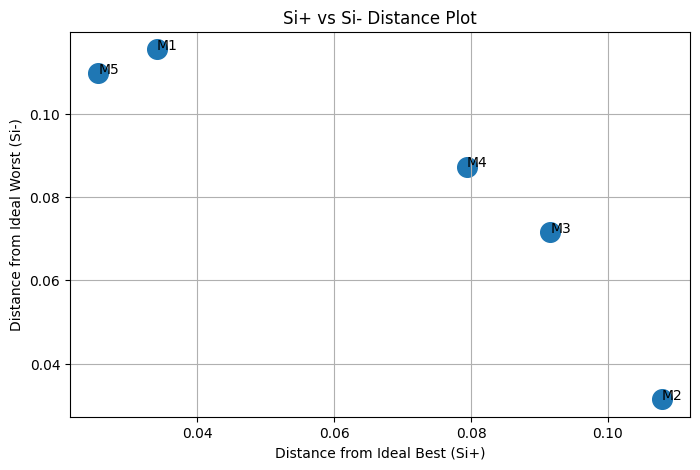

In [39]:
plt.figure(figsize=(8,5))
plt.scatter(data["Si+"], data["Si-"], s=200)

for i, model in enumerate(data["Model"]):
    plt.text(data["Si+"][i], data["Si-"][i], model)

plt.xlabel("Distance from Ideal Best (Si+)")
plt.ylabel("Distance from Ideal Worst (Si-)")
plt.title("Si+ vs Si- Distance Plot")
plt.grid(True)
plt.show()

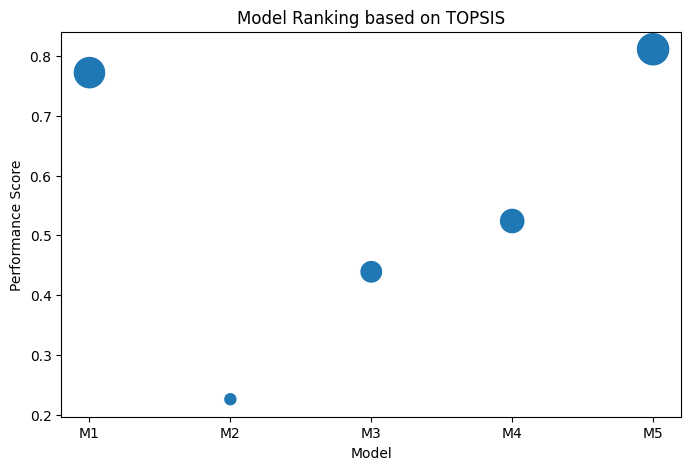

In [32]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="Model",
    y="Performance Score",
    size="Performance Score",
    data=data,
    legend=False,
    sizes=(100, 600)
)
plt.title("Model Ranking based on TOPSIS")
plt.show()

/tmp/ipython-input-1451087898.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


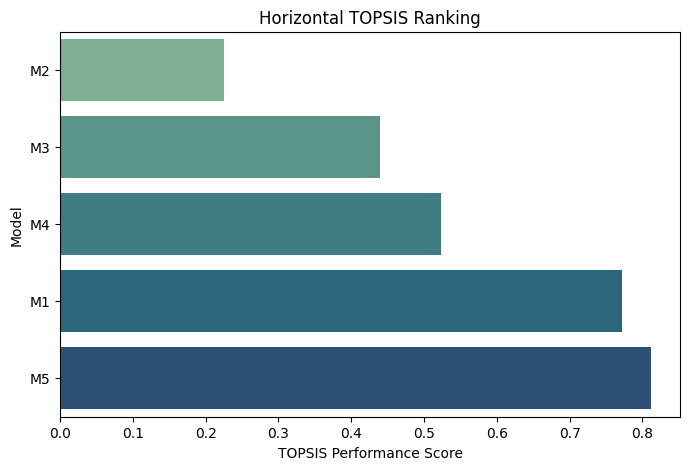

In [40]:
plt.figure(figsize=(8,5))
sns.barplot(
    y="Model",
    x="Performance Score",
    data=data.sort_values("Performance Score"),
    palette="crest"
)
plt.xlabel("TOPSIS Performance Score")
plt.ylabel("Model")
plt.title("Horizontal TOPSIS Ranking")
plt.show()

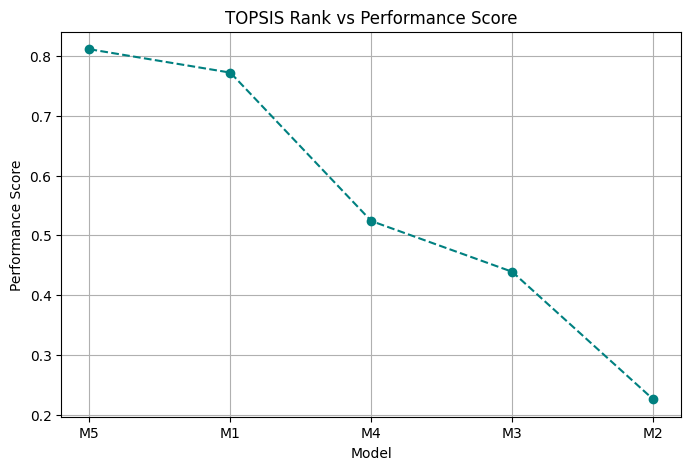

In [34]:
plt.figure(figsize=(8,5))
data_sorted = data.sort_values("Rank")

plt.plot(
    data_sorted["Model"],
    data_sorted["Performance Score"],
    marker='o',
    linestyle='--',
    color='teal'
)

plt.xlabel("Model")
plt.ylabel("Performance Score")
plt.title("TOPSIS Rank vs Performance Score")
plt.grid(True)
plt.show()

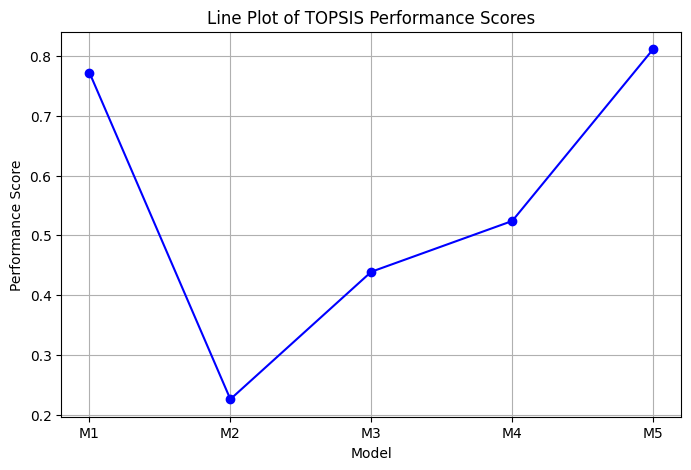

In [41]:
plt.figure(figsize=(8,5))
plt.plot(
    data["Model"],
    data["Performance Score"],
    marker='o',
    linestyle='-',
    color='blue'
)

plt.xlabel("Model")
plt.ylabel("Performance Score")
plt.title("Line Plot of TOPSIS Performance Scores")
plt.grid(True)
plt.show()

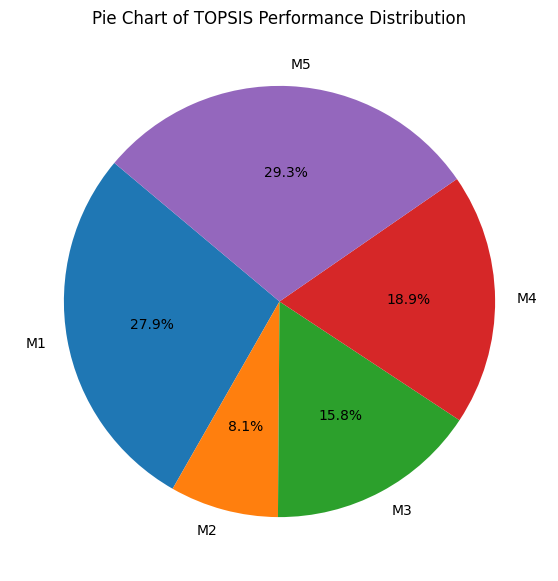

In [42]:
plt.figure(figsize=(7,7))
plt.pie(
    data["Performance Score"],
    labels=data["Model"],
    autopct='%1.1f%%',
    startangle=140
)

plt.title("Pie Chart of TOPSIS Performance Distribution")
plt.show()

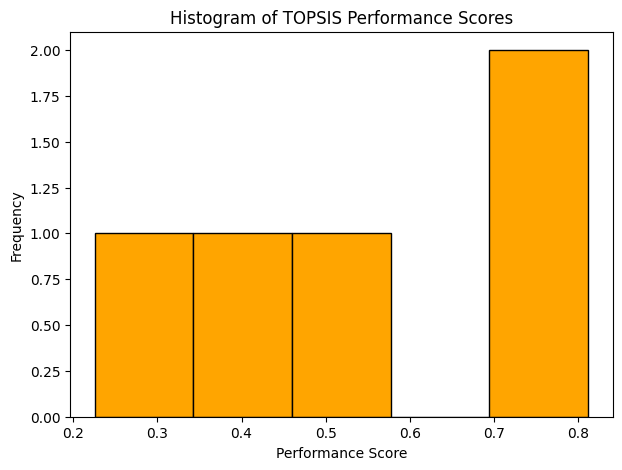

In [43]:
plt.figure(figsize=(7,5))
plt.hist(
    data["Performance Score"],
    bins=5,
    color="orange",
    edgecolor="black"
)

plt.xlabel("Performance Score")
plt.ylabel("Frequency")
plt.title("Histogram of TOPSIS Performance Scores")
plt.show()

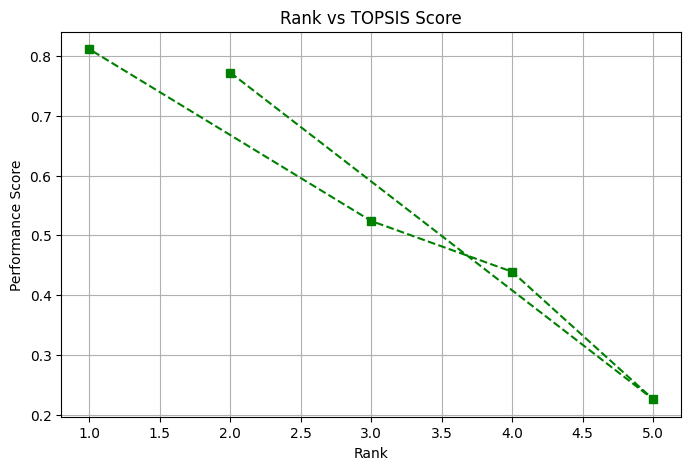

In [45]:
plt.figure(figsize=(8,5))
plt.plot(
    data["Rank"],
    data["Performance Score"],
    marker='s',
    linestyle='--',
    color='green'
)

plt.xlabel("Rank")
plt.ylabel("Performance Score")
plt.title("Rank vs TOPSIS Score")
plt.grid(True)
plt.show()